In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from graphviz import Digraph
#import xgboost as xg 
import lightgbm as lgb

In [11]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [13]:
# take out some small A
fires_clean=pd.read_csv("/Users/peipeikuo/Dropbox (MIT)/AA Edge Forest fires/clean_classification_updated.csv")

In [14]:
fires_clean.head()

,Unnamed: 0,drybulbtemp,atm_moisture,wind_azimuth,avg_windspeed,fuelmoisture,maxtemp,mintemp,maxhumid,minhumid,precip_duration,precip_amt,FIRE_YEAR,MONTH,DISCOVERY_DOY,DISCOVERY_TIME,FIRE_SIZE_CLASS,FIRE_SIZE,wetflag_Y,FIPS_NAME_y_Amador,FIPS_NAME_y_Butte,FIPS_NAME_y_Colusa,FIPS_NAME_y_El Dorado,FIPS_NAME_y_Fresno,FIPS_NAME_y_Glenn,FIPS_NAME_y_Inyo,FIPS_NAME_y_Kern,FIPS_NAME_y_Lake,FIPS_NAME_y_Lassen,FIPS_NAME_y_Los Angeles,FIPS_NAME_y_Madera,FIPS_NAME_y_Marin,FIPS_NAME_y_Mariposa,FIPS_NAME_y_Mendocino,FIPS_NAME_y_Merced,FIPS_NAME_y_Modoc,FIPS_NAME_y_Mono,FIPS_NAME_y_Monterey,FIPS_NAME_y_Nevada,FIPS_NAME_y_Placer,FIPS_NAME_y_Riverside,FIPS_NAME_y_San Benito,FIPS_NAME_y_San Bernardino,FIPS_NAME_y_San Luis Obispo,FIPS_NAME_y_Santa Barbara,FIPS_NAME_y_Shasta,FIPS_NAME_y_Sierra,FIPS_NAME_y_Siskiyou,FIPS_NAME_y_Sonoma,FIPS_NAME_y_Tehama,FIPS_NAME_y_Trinity,FIPS_NAME_y_Tulare,FIPS_NAME_y_Tuolumne,FIPS_NAME_y_Ventura,FIPS_NAME_y_Yolo,FIPS_NAME_y_Yuba,STAT_CAUSE_CODE_10,STAT_CAUSE_CODE_11,STAT_CAUSE_CODE_12,STAT_CAUSE_CODE_13,STAT_CAUSE_CODE_2,STAT_CAUSE_CODE_3,STAT_CAUSE_CODE_4,STAT_CAUSE_CODE_5,STAT_CAUSE_CODE_6,STAT_CAUSE_CODE_7,STAT_CAUSE_CODE_8,STAT_CAUSE_CODE_9
0,1,42.0,68.0,338.0,3.0,24.0,42.0,32.0,100.0,68.0,1.0,60.0,1993,4,95,1610,A,0.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,78.0,23.0,338.0,3.0,5.0,78.0,37.0,78.0,22.0,0.0,0.0,1993,7,198,1900,A,0.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,79.0,24.0,338.0,4.0,5.0,79.0,42.0,77.0,23.0,0.0,0.0,1993,7,199,1330,A,0.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,83.0,31.0,338.0,4.0,6.0,83.0,48.0,93.0,27.0,0.0,0.0,1993,7,205,1300,A,0.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,82.0,37.0,240.0,4.0,8.0,82.0,49.0,100.0,37.0,0.0,0.0,1995,7,199,1230,A,0.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
fires_clean=fires_clean[fires_clean["FIRE_SIZE"]>0.5]
fires_clean["BIN_FIRE_SIZE"] = (fires_clean["FIRE_SIZE"]>=2)

In [16]:
fires_clean.loc[fires_clean["BIN_FIRE_SIZE"] == True,"BIN_FIRE_SIZE"] =1
fires_clean.loc[fires_clean["BIN_FIRE_SIZE"] == False,"BIN_FIRE_SIZE"] =0

In [17]:
fires_clean.head()

,Unnamed: 0,drybulbtemp,atm_moisture,wind_azimuth,avg_windspeed,fuelmoisture,maxtemp,mintemp,maxhumid,minhumid,precip_duration,precip_amt,FIRE_YEAR,MONTH,DISCOVERY_DOY,DISCOVERY_TIME,FIRE_SIZE_CLASS,FIRE_SIZE,wetflag_Y,FIPS_NAME_y_Amador,FIPS_NAME_y_Butte,FIPS_NAME_y_Colusa,FIPS_NAME_y_El Dorado,FIPS_NAME_y_Fresno,FIPS_NAME_y_Glenn,FIPS_NAME_y_Inyo,FIPS_NAME_y_Kern,FIPS_NAME_y_Lake,FIPS_NAME_y_Lassen,FIPS_NAME_y_Los Angeles,FIPS_NAME_y_Madera,FIPS_NAME_y_Marin,FIPS_NAME_y_Mariposa,FIPS_NAME_y_Mendocino,FIPS_NAME_y_Merced,FIPS_NAME_y_Modoc,FIPS_NAME_y_Mono,FIPS_NAME_y_Monterey,FIPS_NAME_y_Nevada,FIPS_NAME_y_Placer,FIPS_NAME_y_Riverside,FIPS_NAME_y_San Benito,FIPS_NAME_y_San Bernardino,FIPS_NAME_y_San Luis Obispo,FIPS_NAME_y_Santa Barbara,FIPS_NAME_y_Shasta,FIPS_NAME_y_Sierra,FIPS_NAME_y_Siskiyou,FIPS_NAME_y_Sonoma,FIPS_NAME_y_Tehama,FIPS_NAME_y_Trinity,FIPS_NAME_y_Tulare,FIPS_NAME_y_Tuolumne,FIPS_NAME_y_Ventura,FIPS_NAME_y_Yolo,FIPS_NAME_y_Yuba,STAT_CAUSE_CODE_10,STAT_CAUSE_CODE_11,STAT_CAUSE_CODE_12,STAT_CAUSE_CODE_13,STAT_CAUSE_CODE_2,STAT_CAUSE_CODE_3,STAT_CAUSE_CODE_4,STAT_CAUSE_CODE_5,STAT_CAUSE_CODE_6,STAT_CAUSE_CODE_7,STAT_CAUSE_CODE_8,STAT_CAUSE_CODE_9,BIN_FIRE_SIZE
6,7,88.0,23.0,339.0,4.0,5.0,91.0,53.0,68.0,19.0,0.0,0.0,1996,6,155,1635,B,1.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,8,88.0,23.0,339.0,4.0,5.0,91.0,53.0,68.0,19.0,0.0,0.0,1996,6,155,1530,B,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14,15,94.0,31.0,341.0,2.0,5.0,94.0,54.0,76.0,23.0,0.0,0.0,1996,7,208,619,C,30.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
25,26,51.0,19.0,179.0,9.0,10.0,67.0,34.0,91.0,19.0,0.0,0.0,1996,12,352,1535,B,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
27,28,59.0,23.0,290.0,2.0,7.0,59.0,30.0,100.0,23.0,0.0,0.0,1997,4,101,1355,B,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [18]:
fires_clean.dtypes

Unnamed: 0                       int64
drybulbtemp                    float64
atm_moisture                   float64
wind_azimuth                   float64
avg_windspeed                  float64
fuelmoisture                   float64
maxtemp                        float64
mintemp                        float64
maxhumid                       float64
minhumid                       float64
precip_duration                float64
precip_amt                     float64
FIRE_YEAR                        int64
MONTH                            int64
DISCOVERY_DOY                    int64
DISCOVERY_TIME                   int64
FIRE_SIZE_CLASS                 object
FIRE_SIZE                      float64
wetflag_Y                        int64
FIPS_NAME_y_Amador               int64
FIPS_NAME_y_Butte                int64
FIPS_NAME_y_Colusa               int64
FIPS_NAME_y_El Dorado            int64
FIPS_NAME_y_Fresno               int64
FIPS_NAME_y_Glenn                int64
FIPS_NAME_y_Inyo         

In [19]:
#X = fires_clean.iloc[:, :-1]
X = fires_clean.drop(columns=['Unnamed: 0','FIRE_SIZE_CLASS','FIRE_SIZE','BIN_FIRE_SIZE'])
X_train, X_test, y_train, y_test = train_test_split(X, fires_clean["BIN_FIRE_SIZE"], test_size=0.2,random_state=15072)

In [24]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [20]:
X.dtypes

drybulbtemp                    float64
atm_moisture                   float64
wind_azimuth                   float64
avg_windspeed                  float64
fuelmoisture                   float64
maxtemp                        float64
mintemp                        float64
maxhumid                       float64
minhumid                       float64
precip_duration                float64
precip_amt                     float64
FIRE_YEAR                        int64
MONTH                            int64
DISCOVERY_DOY                    int64
DISCOVERY_TIME                   int64
wetflag_Y                        int64
FIPS_NAME_y_Amador               int64
FIPS_NAME_y_Butte                int64
FIPS_NAME_y_Colusa               int64
FIPS_NAME_y_El Dorado            int64
FIPS_NAME_y_Fresno               int64
FIPS_NAME_y_Glenn                int64
FIPS_NAME_y_Inyo                 int64
FIPS_NAME_y_Kern                 int64
FIPS_NAME_y_Lake                 int64
FIPS_NAME_y_Lassen       

In [25]:
# gbm = lgb.LGBMClassifier(objective='binary',
#                         num_leaves=80,
#                         metric = 'l1',
#                         learning_rate=0.2,
#                         n_estimators=100,
#                         class_weight={0:0.3,1:0.7})
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         max_depth = 15,
                         num_leaves = 40,
                         feature_fraction = 0.8,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 0.9,
                         bagging_freq = 3,
                         lambda_l1 = 0.6,
                         lambda_l2 = 40,
                         cat_smooth = 0,
                         num_iterations = 200, 
                         random_state=111,
                         class_weight={0:0.5,1:0.5}
                        )
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.658157	valid_0's binary_logloss: 0.681675
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.658536	valid_0's binary_logloss: 0.675915
[3]	valid_0's auc: 0.659094	valid_0's binary_logloss: 0.670851
[4]	valid_0's auc: 0.663556	valid_0's binary_logloss: 0.666321
[5]	valid_0's auc: 0.663494	valid_0's binary_logloss: 0.662655
[6]	valid_0's auc: 0.673646	valid_0's binary_logloss: 0.658525
[7]	valid_0's auc: 0.675145	valid_0's binary_logloss: 0.655294
[8]	valid_0's auc: 0.674163	valid_0's binary_logloss: 0.652967
[9]	valid_0's auc: 0.674207	valid_0's binary_logloss: 0.650484
[10]	valid_0's auc: 0.675269	valid_0's binary_logloss: 0.64823
[11]	valid_0's auc: 0.675909	valid_0's binary_logloss: 0.646355
[12]	valid_0's auc: 0.677711	valid_0's binary_logloss: 0.644297
[13]	valid_0's auc: 0.68013	valid_0's binary_logloss: 0.642751
[14]	valid_0's auc: 0.680626	valid_0's binary_logloss: 0.641639
[15]	valid_0's auc: 0.6826	valid_0's binary_logloss: 0.

C:\Users\Rebecca\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, cat_smooth=0,
               class_weight={0: 0.5, 1: 0.5}, feature_fraction=0.8,
               lambda_l1=0.6, lambda_l2=40, max_depth=15,
               metric='binary_logloss,auc', min_child_samples=21,
               num_iterations=200, num_leaves=40, objective='binary',
               random_state=111)

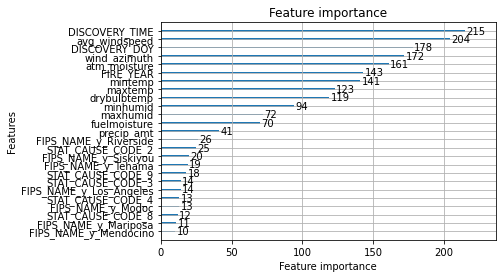

In [26]:
ax = lgb.plot_importance(gbm, max_num_features=25)
plt.show()

In [27]:
#prediction on the test set
y_pred=gbm.predict(X_test)
#roc_auc_score metric
roc_auc_score(y_test,y_pred)

0.6438494041614863

In [28]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [29]:
confusion_matrix(y_test,y_pred, normalize='true')

array([[0.50930851, 0.49069149],
       [0.2216097 , 0.7783903 ]])

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test.values, y_pred).ravel()
tn, fp, fn, tp

(383, 369, 201, 706)

In [31]:
fn /(tp+fn)

0.22160970231532526

In [32]:
precision_score(y_test, y_pred,average='micro')
recall_score(y_test, y_pred,average='micro')
f1_score(y_test, y_pred,average='micro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57       752
           1       0.66      0.78      0.71       907

    accuracy                           0.66      1659
   macro avg       0.66      0.64      0.64      1659
weighted avg       0.66      0.66      0.65      1659



0.6438494041614863


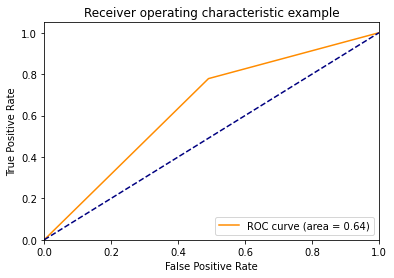

In [33]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')              
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##### printing out results

In [34]:
countylist = []
for i in (X_test.index):
    for col in X_test.loc[:,"FIPS_NAME_y_Amador":"FIPS_NAME_y_Yuba"].columns:
        if X_test.loc[i,col] == 1:
            countylist.append(col[12:])

In [41]:
results=pd.DataFrame({"County":countylist,"DayOfYear":X_test.DISCOVERY_DOY,"Real_size":y_test.values,"Pred_size":y_pred})
results

,County,DayOfYear,Real_size,Pred_size
10190,Riverside,197,1,0
5743,Riverside,257,1,1
24924,Lassen,206,1,1
19352,San Bernardino,160,1,1
5969,Riverside,265,1,1
30559,Trinity,173,1,1
22708,San Bernardino,193,0,0
25624,Lassen,214,1,1
923,El Dorado,258,0,1
29242,Shasta,215,0,1


In [43]:
#results.to_csv("final_gboost_preds.csv",index=False)

### tune

In [121]:
from sklearn.model_selection import GridSearchCV 

In [122]:
#### step1 :max_depth , num_leaves

In [123]:
parameters = {
    'max_depth': [10,15,20],
    'num_leaves': [40,60,80],
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200, 
                         random_state=111
                        )

In [124]:
gsearch_1_1 = GridSearchCV(gbm, param_grid=parameters, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gsearch_1_1.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   16.0s finished
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      metric='binary_logloss,auc',
                                      min_child_samples=21,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=31, objective='binary',
                                      random_state=111, reg_alpha=0.001,
                                      reg_lambda=8, silent=True

In [125]:
print('best_score_:{0}'.format(gsearch_1_1.best_score_))

best_score_:0.6939105837251881


In [126]:
print('best_params_:{0}'.format(gsearch_1_1.best_params_))

best_params_:{'max_depth': 15, 'num_leaves': 40}


In [127]:
#### step2 min_data_in_leaf , min_sum_hessian_in_leaf

In [133]:
parameters = {
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight':[0.001,0.002]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         max_depth = 15,
                         num_leaves = 40,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200, 
                         random_state=111
                        )

In [134]:
gsearch_2 = GridSearchCV(gbm, param_grid=parameters, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gsearch_2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.3s finished
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=15,
                                      metric='binary_logloss,auc',
                                      min_child_samples=21,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=40, objective='binary',
                                      random_state=111, reg_alpha=0.001,
                                      reg_lambda=8, silent=True

In [135]:
print('best_score_:{0}'.format(gsearch_2.best_score_))

best_score_:0.6939105837251881


In [136]:
print('best_params_:{0}'.format(gsearch_2.best_params_))

best_params_:{'min_child_samples': 21, 'min_child_weight': 0.001}


In [132]:
#### step3 feature_fraction

In [137]:
parameters = {
   'feature_fraction': [0.6, 0.8, 1]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         max_depth = 15,
                         num_leaves = 40,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200, 
                         random_state=111
                        )

In [138]:
gsearch_3 = GridSearchCV(gbm, param_grid=parameters, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gsearch_3.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.5s finished
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=15,
                                      metric='binary_logloss,auc',
                                      min_child_samples=21,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=40, objective='binary',
                                      random_state=111, reg_alpha=0.001,
                                      reg_lambda=8, silent=True

In [139]:
print('best_score_:{0}'.format(gsearch_3.best_score_))

best_score_:0.6918951787848743


In [140]:
print('best_params_:{0}'.format(gsearch_3.best_params_))

best_params_:{'feature_fraction': 0.8}


In [ ]:
#### step4 cat_smooth

In [141]:
parameters = {
              'cat_smooth': [0,10,20]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         max_depth = 15,
                         num_leaves = 40,
                         feature_fraction = 0.8,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 0.9,
                         bagging_freq = 3,
                         lambda_l1 = 0.6,
                         lambda_l2 = 40,
                         cat_smooth = 0,
                         num_iterations = 200, 
                         random_state=111
                        )

In [142]:
gsearch_6 = GridSearchCV(gbm, param_grid=parameters, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gsearch_6.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.0s finished
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split', lambda_l1=0.6,
                                      lambda_l2=40, learning_rate=0.1,
                                      max_depth=15, metric='binary_logloss,auc',
                                      min_child_samples=21,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=40, objective='binary',
                                      random_state=111, reg_alpha=0.0,
                                  

In [143]:
print('best_score_:{0}'.format(gsearch_6.best_score_))

best_score_:0.6975423489991902


In [144]:
print('best_params_:{0}'.format(gsearch_6.best_params_))

best_params_:{'cat_smooth': 0}
